# Sentiment Analysis of Mobile Phones in Amazon

### Part 3: Emotion Analysis

#### Import library

In [204]:
import pandas as pd
import numpy as np
from nltk import word_tokenize
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
#import cufflinks as cf #For pie chart drawing

#### Import dataset

In [22]:
# Continue the work from Part 2
cleanDF = pd.read_csv (r'C:\Users\FORGE-15 I7\OneDrive - AsiaPay Limited\Sem 3\Project\cleanDF_0328_3.csv')
cleanDF

,Product,Brand,Price,Rating,Reviews,ReviewVotes,CleanedReviews,Polarity,Polarity_Index
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,feel lucki phone hard phone upgrad sell son ol...,Positive,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revu clean set e...,Positive,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,pleas,Neutral,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,work good slow good phone love,Positive,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone replac lose phone thing volum butt...,Positive,1
...,...,...,...,...,...,...,...,...,...
380521,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,ZTE,167.22,5,EXCELENTE,0.0,excelent,Neutral,0
380522,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,ZTE,167.22,2,Not as expected so I returned this phone,0.0,expect return phone,Neutral,0
380523,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,ZTE,167.22,5,very well,0.0,well,Positive,1
380524,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,ZTE,167.22,5,excelente,0.0,excelent,Neutral,0


#### Emotion Analysis

In [23]:
# Define function of emotion analysis
def text_emotion(df, column):
    '''
    Takes a DataFrame and a specified column of text and adds 10 columns to the
    DataFrame for each of the 10 emotions in the NRC Emotion Lexicon, with each
    column containing the value of the text in that emotions
    INPUT: DataFrame, string
    OUTPUT: the original DataFrame with ten new columns
    '''

    new_df = df.copy()

    filepath = r'C:\Users\FORGE-15 I7\Desktop\Sentiment-Analysis-Phone-Amazon\Dataset\NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'
    emolex_df = pd.read_csv(filepath,
                            names=["word", "emotion", "association"],
                            sep='\t')
    emolex_words = emolex_df.pivot(index='word',
                                   columns='emotion',
                                   values='association').reset_index()
    emotions = emolex_words.columns.drop('word')
    emo_df = pd.DataFrame(0, index=df.index, columns=emotions)

    
    book = ''
    chapter = ''
    
    with tqdm(total=len(list(new_df.iterrows()))) as pbar:
        for i, row in new_df.iterrows():
            pbar.update(1)
            document = word_tokenize(new_df.loc[i][column])
            for word in document:
                emo_score = emolex_words[emolex_words.word == word]
                if not emo_score.empty:
                    for emotion in list(emotions):
                        emo_df.at[i, emotion] += emo_score[emotion]

    new_df = pd.concat([new_df, emo_df], axis=1)

    return new_df

In [25]:
emoDF = text_emotion(cleanDF, 'CleanedReviews')
emoDF

,Product,Brand,Price,Rating,Reviews,ReviewVotes,CleanedReviews,Polarity,Polarity_Index,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,feel lucki phone hard phone upgrad sell son ol...,Positive,1,0,0,0,0,0,1,1,1,0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revu clean set e...,Positive,1,0,1,0,0,2,0,2,0,0,2
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,pleas,Neutral,0,0,0,0,0,0,0,0,0,0,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,work good slow good phone love,Positive,1,0,2,0,0,3,0,3,0,2,2
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone replac lose phone thing volum butt...,Positive,1,1,0,1,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380521,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,ZTE,167.22,5,EXCELENTE,0.0,excelent,Neutral,0,0,0,0,0,0,0,0,0,0,0
380522,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,ZTE,167.22,2,Not as expected so I returned this phone,0.0,expect return phone,Neutral,0,0,1,0,0,0,0,1,0,1,1
380523,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,ZTE,167.22,5,very well,0.0,well,Positive,1,0,0,0,0,0,0,0,0,0,0
380524,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,ZTE,167.22,5,excelente,0.0,excelent,Neutral,0,0,0,0,0,0,0,0,0,0,0


**The emotion analysis process is very time consuming, it take approximately 5 to 8 hours. So i write the output into a csv file. 

## Explore the finding of emotion analysis 

In [99]:
# Read Dataset
emoDF = pd.read_csv(r'C:\Users\FORGE-15 I7\OneDrive - AsiaPay Limited\Sem 3\Project\emoDF_0328.csv')

In [100]:
# Drop unused columns
emoDF.drop(['Price', 'Rating', 'Reviews', 'ReviewVotes', 'CleanedReviews', 'Polarity', 'Polarity_Index'], axis=1, inplace=True)
emoDF

,Product,Brand,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,word_count
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,0,0,0,0,0,1,1,1,0,1,20
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,0,1,0,0,2,0,2,0,0,2,21
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,0,0,0,0,0,0,0,0,0,0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,0,2,0,0,3,0,3,0,2,2,6
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,1,0,1,1,0,1,1,1,1,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380521,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,ZTE,0,0,0,0,0,0,0,0,0,0,1
380522,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,ZTE,0,1,0,0,0,0,1,0,1,1,3
380523,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,ZTE,0,0,0,0,0,0,0,0,0,0,1
380524,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,ZTE,0,0,0,0,0,0,0,0,0,0,1


#### Total of words matched with corresponding emotions for each brand

In [105]:
emoDF = emoDF.groupby((['Brand']), as_index=False, sort=True).sum()
emoDF

,Brand,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,word_count
0,AKUA,2,4,0,6,6,6,10,6,4,6,76
1,ASUS,1759,4637,1003,1972,3600,3931,6985,2196,2591,4591,79906
2,Acer,16,33,9,14,24,25,33,18,20,38,442
3,Aeku,0,8,0,2,6,7,8,2,5,4,95
4,Alcatel,951,2958,540,1183,2385,2417,4766,1300,1694,2927,52232
5,Apple,14850,60855,8284,18256,50559,33775,83866,20926,31245,51473,702157
6,BLU,22816,73747,13962,28189,62598,54514,109941,33165,44334,69333,1108526
7,BlackBerry,5654,19283,3640,6200,15124,11702,27397,7546,10859,18237,311568
8,Blackview,39,85,28,47,71,100,125,60,51,81,1558
9,CUBOT,21,56,12,16,38,30,70,22,31,47,725


#### Explore 'positive' & 'negative' words in dataset 

In [106]:
sumPN =emoDF[['positive','negative']].apply(sum)
sumPN

positive    597987
negative    280440
dtype: int64

In [107]:
# Convert in dataframe
sumPN_DF = pd.DataFrame({'Sentiment' : sumPN.index, 'Total' : sumPN.values}) 
sumPN_DF

,Sentiment,Total
0,positive,597987
1,negative,280440


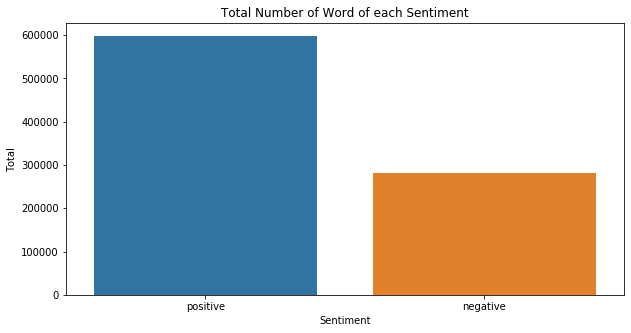

In [108]:
# Plot the bar graph
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=sumPN_DF,
    x='Sentiment',
    y='Total'
).set_title("Total Number of Word of each Sentiment")

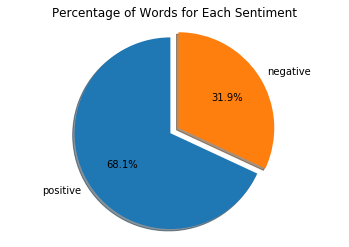

In [117]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = sumPN_DF['Sentiment']
sizes =  sumPN_DF['Total']
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Percentage of Words for Each Sentiment")
plt.show()

#### Explore words corresponding to each emotions in dataset 

There is eight emotions in dataset which are 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise' and 'trust'.

In [110]:
sumEmotion =emoDF[['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']].apply(sum)
sumEmotion

anger           116243
anticipation    406485
disgust          70194
fear            143849
joy             331351
sadness         167249
surprise        224309
trust           373697
dtype: int64

In [111]:
sumEmotion_DF = pd.DataFrame({'Emotion' : sumEmotion.index, 'Total' : sumEmotion.values}) 
sumEmotion_DF

,Emotion,Total
0,anger,116243
1,anticipation,406485
2,disgust,70194
3,fear,143849
4,joy,331351
5,sadness,167249
6,surprise,224309
7,trust,373697


In [185]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

Text(0.5, 1.0, 'Total Number of Words of each Emotion')

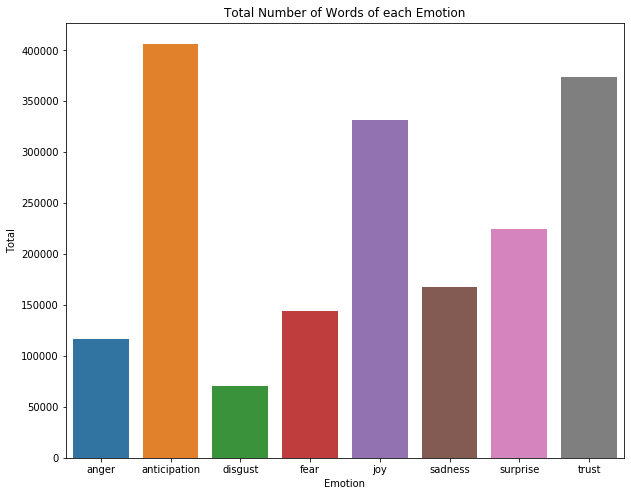

In [187]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="Emotion", y="Total", data=sumEmotion_DF)
ax.set_title("Total Number of Words of each Emotion")
#show_values_on_bars(ax)

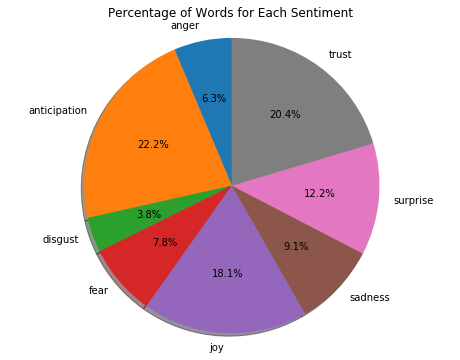

In [165]:
# Plot pie chart
labels = sumEmotion_DF['Emotion']
sizes =  sumEmotion_DF['Total']

#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 6
#fig_size[1] = 4
#plt.rcParams["figure.figsize"] = fig_size
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Percentage of Words for Each Sentiment")
plt.show()

#### Calculate the weight of each emotion 

In [166]:
# Emotion available in dataset
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']

In [167]:
# Number of word for each emotion is divided by word count
for emotion in emotions:
    emoDF[emotion] = emoDF[emotion] / emoDF['word_count']

In [168]:
# Set Brand as index
emoDF.set_index(['Brand'], inplace=True)

In [169]:
emoDF

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,word_count
Brand,,,,,,,,,,,
AKUA,0.026316,0.052632,0.000000,0.078947,0.078947,0.078947,0.131579,0.078947,0.052632,0.078947,76
ASUS,0.022013,0.058031,0.012552,0.024679,0.045053,0.049195,0.087415,0.027482,0.032426,0.057455,79906
Acer,0.036199,0.074661,0.020362,0.031674,0.054299,0.056561,0.074661,0.040724,0.045249,0.085973,442
Aeku,0.000000,0.084211,0.000000,0.021053,0.063158,0.073684,0.084211,0.021053,0.052632,0.042105,95
Alcatel,0.018207,0.056632,0.010338,0.022649,0.045662,0.046274,0.091247,0.024889,0.032432,0.056038,52232
Apple,0.021149,0.086669,0.011798,0.026000,0.072005,0.048102,0.119441,0.029802,0.044499,0.073307,702157
BLU,0.020582,0.066527,0.012595,0.025429,0.056470,0.049177,0.099178,0.029918,0.039994,0.062545,1108526
BlackBerry,0.018147,0.061890,0.011683,0.019899,0.048542,0.037558,0.087933,0.024219,0.034853,0.058533,311568
Blackview,0.025032,0.054557,0.017972,0.030167,0.045571,0.064185,0.080231,0.038511,0.032734,0.051990,1558


In [183]:
tab10 = matplotlib.cm.get_cmap('tab10')

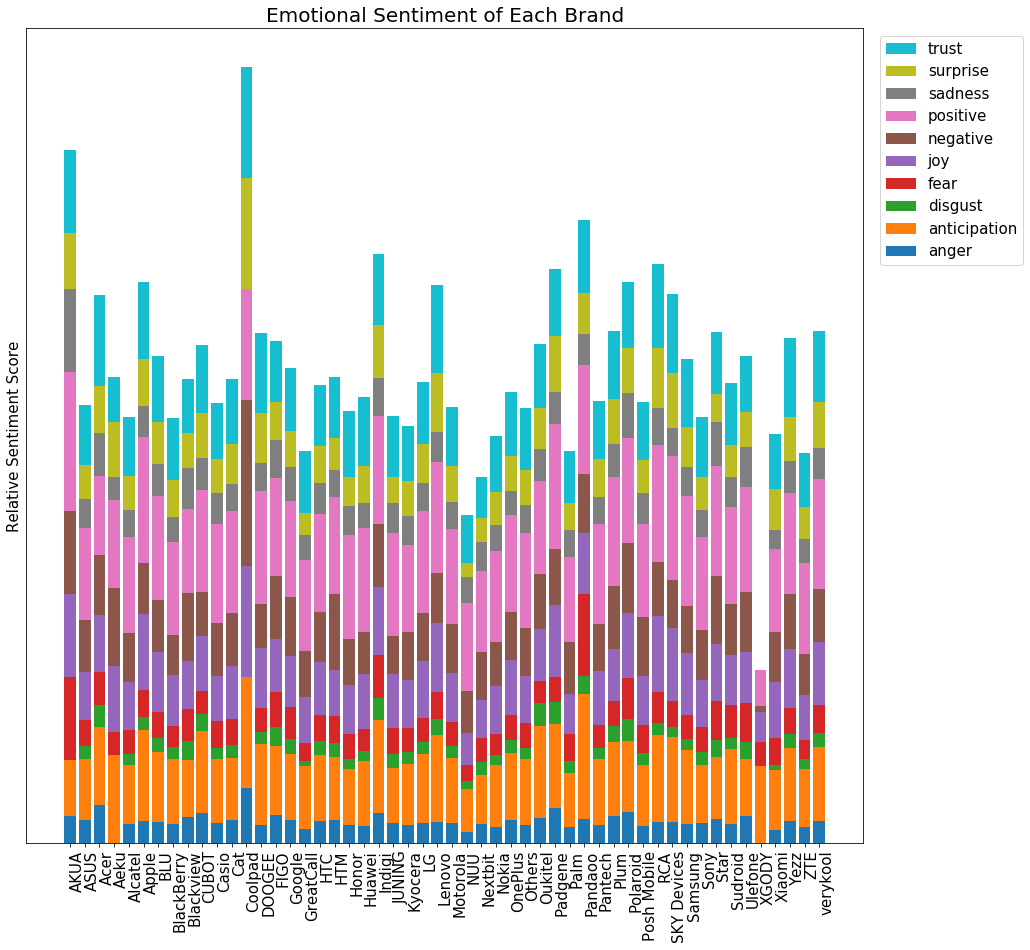

In [184]:
# Plot graph for emotion sentiment of each brand
brands = list(emoDF.index)
margin_bottom = np.zeros(len(brands))

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1)

for c, emotion in enumerate(emotions):
    y = np.array(emoDF[emotion])
    plt.bar(brands, y, bottom=margin_bottom, label=emotion, color=(tab10(c)))
    margin_bottom += y
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='best', fontsize=15, bbox_to_anchor=(1.2, 1))
plt.title('Emotional Sentiment of Each Brand', fontsize=20)
plt.xticks(brands, brands, rotation=90, ha='left', fontsize=15)
plt.ylabel('Relative Sentiment Score', fontsize=15)
plt.yticks([])
ax.grid(False)
plt.show()